In [1]:
%pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498207 sha256=7aac170b0a7480ffd0574d69852485f777ec0b35803d1d266638710b68e34423
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext


In [2]:
import pandas as pd
import fasttext
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [138]:
# Baca dataset
df = pd.read_csv("/content/dataset_laptop_preprocessed_v3.csv")

In [139]:
# Baca dataset
df2 = pd.read_csv("/content/dataset_laptop_preprocessed_v3.csv")

In [140]:
# Baca dataset
df3 = pd.read_csv("/content/dataset_laptop_preprocessed_v2.csv")

In [141]:
# Format FastText: __label__<label> <text>
df['fasttext_format'] = '__label__' + df['label_rekomendasi'] + ' ' + df['preprocessed']

In [142]:
# Format FastText: __label__<label> <text>
df2['fasttext_format'] = '__label__' + df2['label_rekomendasi'] + ' ' + df2['preprocessed']

In [143]:
# Format FastText: __label__<label> <text>
df3['fasttext_format'] = '__label__' + df3['label_rekomendasi'] + ' ' + df3['preprocessed']

In [144]:
# Simpan ke file txt
df['fasttext_format'].to_csv("fasttext_train.txt", index=False, header=False)

In [145]:
# Simpan ke file txt
df2['fasttext_format'].to_csv("fasttext_train_v2.txt", index=False, header=False)

In [146]:
# Simpan ke file txt
df3['fasttext_format'].to_csv("fasttext_train_v3.txt", index=False, header=False)

In [147]:
# Latih model dalam mode supervised
model = fasttext.train_supervised(input="fasttext_train.txt", epoch=25, lr=1.0, wordNgrams=3, dim=50)

In [148]:
# Latih model dalam mode supervised
model2 = fasttext.train_supervised(input="fasttext_train_v2.txt", epoch=25, lr=1.0, wordNgrams=3, dim=50)

In [149]:
# Latih model dalam mode supervised
model3 = fasttext.train_supervised(input="fasttext_train_v3.txt", epoch=25, lr=1.0, wordNgrams=3, dim=200)

In [150]:
# Simpan model
model.save_model("fasttext_model.bin")

In [151]:
# Simpan model
model2.save_model("fasttext_model_v2.bin")

In [152]:
# Simpan model
model3.save_model("fasttext_model_v3.bin")

In [153]:
# testing model FastText
vector = model.get_sentence_vector("butuh laptop ringan untuk desain dan kuliah")
print(vector)  # Ini adalah array numpy 1x100 (default dim=50)

[ 0.06817213 -0.09169684  0.0394198   0.00753228 -0.04690523  0.01779559
  0.00962314  0.0237632  -0.10035383  0.01997695 -0.01696007  0.00458842
  0.01087155  0.03631116 -0.10463376 -0.02216729 -0.03193166 -0.0114978
  0.02391416 -0.0774396  -0.04519218 -0.01966001  0.00210959  0.05198342
 -0.0619     -0.00627365 -0.01739261 -0.0522515   0.04297692 -0.04035397
  0.00156368 -0.01523488  0.0051111  -0.06552837 -0.03062988  0.00283976
 -0.03013967  0.05603753  0.0378091   0.02341668 -0.05393689  0.02450413
  0.0481071   0.05360487  0.07614625  0.01877233 -0.04013534 -0.00266329
 -0.01086615  0.02592183]


In [154]:
# Testing model FastText
vector2 = model2.get_sentence_vector("butuh laptop coding multitasking")
print(vector2)  # Ini adalah array numpy 1x100 (default dim=100)

[-0.12466978  0.18838672 -0.02557968 -0.03820786  0.07112142 -0.01517122
 -0.03839798  0.04233804  0.09289095 -0.00541324 -0.01097639  0.0454381
 -0.01178249  0.00441363  0.19410217  0.04998804  0.03519003 -0.00199739
 -0.04627984  0.08158255  0.09916081  0.01482168 -0.04296725 -0.07231958
  0.08242835  0.02666656  0.0384918  -0.02680647 -0.05079354  0.01836747
  0.07872864  0.10111085 -0.02390734  0.07778162  0.03763711 -0.04138484
  0.08633339 -0.04413986 -0.01214684 -0.07376328  0.04197891  0.04094033
 -0.03332335 -0.11555513 -0.12921628 -0.04274125  0.08299933 -0.02689478
  0.04020777 -0.04179623]


In [155]:
# Testing model FastText
vector3 = model3.get_sentence_vector("butuh laptop coding multitasking")
print(vector3)  # Ini adalah array numpy 1x100 (default dim=200)

[-0.00791274 -0.02256249 -0.00313546 -0.0060968  -0.01310901 -0.01940084
 -0.02343905  0.01100862  0.00727924  0.08478093 -0.02860916  0.02462868
  0.05182029 -0.0861177  -0.00441528  0.01296108  0.01797384 -0.01632456
  0.00463505 -0.04481848  0.008968   -0.04821374  0.01555291  0.01418269
  0.06552576 -0.07376748  0.0065852  -0.01344862 -0.0234929   0.00012688
 -0.03954608  0.02451767 -0.02992703  0.07791469 -0.05524022  0.0419758
  0.02870328  0.00722866 -0.01764783 -0.00663162  0.03429546  0.09143206
 -0.04488068 -0.02977951 -0.0354152   0.06020724  0.05630526  0.03076843
  0.09398618  0.05513868  0.04380822 -0.02369902  0.02309245 -0.01473404
  0.02105293  0.02246925  0.00241229 -0.04134788  0.01443045 -0.06615821
 -0.01655779  0.00473183 -0.00557755  0.06175137 -0.01025977  0.01149187
 -0.05176213  0.06438296 -0.03224884 -0.06757086  0.00178458 -0.00459507
 -0.02697891 -0.03397787 -0.08807255  0.01607283 -0.00859544 -0.00478401
 -0.01256702  0.02883913 -0.01913852 -0.01231085  0.

In [156]:
# Load model yang sudah di-train
model = fasttext.load_model('/content/fasttext_model.bin')

In [157]:
# Load model yang sudah di-train
model2 = fasttext.load_model('/content/fasttext_model_v2.bin')

In [158]:
# Load model yang sudah di-train
model3 = fasttext.load_model('/content/fasttext_model_v3.bin')

In [159]:
# Uji representasi vektor dari kata
vector = model.get_word_vector("laptop")
print(vector)

[-1.73868909e-01  2.16242358e-01  9.45350453e-02  1.12515822e-01
 -5.43603965e-04 -2.82016724e-01  2.04131589e-04  3.69828433e-01
  3.90009075e-01  2.22847506e-01 -4.68862504e-01  2.88320154e-01
  2.69898921e-01  1.20165698e-01 -2.12763846e-01  1.30615234e-01
 -3.43276337e-02  1.18843444e-01 -2.48292591e-02 -3.85349423e-01
 -4.76339996e-01 -5.96200638e-02  4.82329354e-02 -2.10093737e-01
 -7.93762431e-02 -1.39083713e-01  4.25346464e-01 -2.51204431e-01
  7.39484355e-02  4.74987291e-02  2.36600965e-01 -3.54181267e-02
  9.38466191e-03 -4.53236580e-01 -4.67162699e-01 -3.37397754e-01
  1.86384156e-01  1.84792280e-01  1.49924561e-01 -5.14555395e-01
 -1.08066872e-01  4.20362085e-01  1.92279354e-01  1.96797073e-01
  1.15933284e-01 -3.66615593e-01  2.97763079e-01  1.19904809e-01
 -5.77156246e-01 -1.98882416e-01]


In [160]:
# Uji representasi vektor dari kata
vector2 = model2.get_word_vector("laptop")
print(vector2)

[-1.73868909e-01  2.16242358e-01  9.45350453e-02  1.12515822e-01
 -5.43603965e-04 -2.82016724e-01  2.04131589e-04  3.69828433e-01
  3.90009075e-01  2.22847506e-01 -4.68862504e-01  2.88320154e-01
  2.69898921e-01  1.20165698e-01 -2.12763846e-01  1.30615234e-01
 -3.43276337e-02  1.18843444e-01 -2.48292591e-02 -3.85349423e-01
 -4.76339996e-01 -5.96200638e-02  4.82329354e-02 -2.10093737e-01
 -7.93762431e-02 -1.39083713e-01  4.25346464e-01 -2.51204431e-01
  7.39484355e-02  4.74987291e-02  2.36600965e-01 -3.54181267e-02
  9.38466191e-03 -4.53236580e-01 -4.67162699e-01 -3.37397754e-01
  1.86384156e-01  1.84792280e-01  1.49924561e-01 -5.14555395e-01
 -1.08066872e-01  4.20362085e-01  1.92279354e-01  1.96797073e-01
  1.15933284e-01 -3.66615593e-01  2.97763079e-01  1.19904809e-01
 -5.77156246e-01 -1.98882416e-01]


In [161]:
# Uji representasi vektor dari kata
vector3 = model3.get_word_vector("laptop")
print(vector3)

[ 0.0671262  -0.18655445 -0.07996591  0.06139395  0.20183878  0.0631891
  0.07971216  0.03174991  0.11257458  0.16753773 -0.27410415 -0.18012457
 -0.08493969 -0.2040077  -0.25917563  0.02823617 -0.02062453 -0.01287861
 -0.04340712 -0.00797556  0.06843609  0.10281812 -0.14883503 -0.19004658
  0.09661582 -0.08831447  0.10970959 -0.1126833  -0.08323198  0.04368467
  0.01308477  0.04593459 -0.23891328 -0.0531044  -0.13456124  0.15484509
  0.14577931  0.26155692  0.0530586   0.05965572 -0.06074239  0.1942237
 -0.05157795  0.13574657  0.03817107 -0.2094946   0.09924245 -0.03848756
  0.03011668  0.10488344 -0.09010579  0.2522624  -0.14216605 -0.00550602
  0.07941837 -0.01285761 -0.03329859  0.09314951  0.01438706  0.03972635
 -0.01334617  0.07501663 -0.0231453   0.26092142 -0.11571707 -0.00814436
 -0.09530976  0.16173387 -0.08875012 -0.03340777 -0.02661298 -0.24271579
 -0.10553747 -0.06668084 -0.23212022  0.13829835  0.04197336 -0.08607411
  0.10765685 -0.00846374 -0.02051112  0.0022483   0.1

In [162]:
# Mengecek kata-kata yang mirip
print(model.get_nearest_neighbors("desain"))

[(0.9769622087478638, 'kapasitas'), (0.9467787742614746, 'editing'), (0.9447224736213684, 'memiliki'), (0.9434596300125122, 'akurasi'), (0.9409714341163635, 'arsitektur'), (0.9392008781433105, 'penyimpanan'), (0.9289366006851196, 'rendering'), (0.9198368191719055, '3d'), (0.9035224914550781, 'autocad'), (0.8917709589004517, 'kualitas')]


In [163]:
# Mengecek kata-kata yang mirip
print(model2.get_nearest_neighbors("ngoding"))

[(0.9787557125091553, 'belajar'), (0.9773648381233215, 'code'), (0.9767335653305054, 'pengembangan'), (0.976473331451416, 'tools'), (0.9720064997673035, 'virtual'), (0.9715960621833801, 'machine'), (0.9696982502937317, 'menguji'), (0.9693998098373413, 'lokal'), (0.969268798828125, 'computing'), (0.9690633416175842, 'developer')]


In [164]:
# Mengecek kata-kata yang mirip
print(model3.get_nearest_neighbors("ngoding"))

[(0.9936782717704773, 'vs'), (0.9934971928596497, 'ide'), (0.992017924785614, 'code'), (0.9901250004768372, 'kebutuhan'), (0.9898210763931274, 'compile'), (0.9894291758537292, 'virtual'), (0.9873350262641907, 'makan'), (0.9832835793495178, 'tools'), (0.9770956635475159, 'dipakai'), (0.9760563969612122, 'aplikasi')]


In [165]:
# Ubah text menjadi vektor menggunakan FastText
def text_to_vector(text):
    return model.get_sentence_vector(text)

X = np.array([text_to_vector(text) for text in df['preprocessed']])
y = df['label_rekomendasi']

In [166]:
# Ubah text menjadi vektor menggunakan FastText
def text_to_vector(text):
    return model2.get_sentence_vector(text)

I = np.array([text_to_vector(text) for text in df2['preprocessed']])
J = df2['label_rekomendasi']

In [167]:
# Ubah text menjadi vektor menggunakan FastText
def text_to_vector(text):
    return model3.get_sentence_vector(text)

K = np.array([text_to_vector(text) for text in df3['preprocessed']])
L = df3['label_rekomendasi']

In [168]:
# Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=42)

In [169]:
# Split data train dan test
I_train, I_test, J_train, J_test = train_test_split(I, J, train_size=0.5, random_state=42)

In [170]:
# Split data train dan test
# K_train, K_test, L_train, L_test = train_test_split(K, L, train_size=0.2, random_state=42)

In [171]:
# Training Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [172]:
# Training Random Forest
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier2.fit(I_train, J_train)

RandomForestClassifier(random_state=42)

In [173]:
# Training Random Forest
rf_classifier3 = RandomForestClassifier(n_estimators=100, random_state=42)

# K-Fold untuk evaluasi 100% data
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [174]:
# Prediksi dan evaluasi
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

Akurasi: 0.9871794871794872
              precision    recall  f1-score   support

      gaming       0.92      1.00      0.96        24
  multimedia       1.00      0.95      0.98        22
      office       1.00      1.00      1.00        37
 programming       1.00      0.97      0.99        38
 workstation       1.00      1.00      1.00        35

    accuracy                           0.99       156
   macro avg       0.98      0.99      0.98       156
weighted avg       0.99      0.99      0.99       156



In [175]:
# Prediksi dan evaluasi
J_pred = rf_classifier2.predict(I_test)
accuracy2 = accuracy_score(J_test, J_pred)
print(f"Akurasi: {accuracy2}")
print(classification_report(J_test, J_pred))

Akurasi: 0.9807692307692307
              precision    recall  f1-score   support

      gaming       0.89      1.00      0.94        16
  multimedia       1.00      0.94      0.97        17
      office       1.00      1.00      1.00        21
 programming       1.00      0.96      0.98        28
 workstation       1.00      1.00      1.00        22

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [176]:
# Menggunakan 5-Fold Cross Validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

print("Hasil Cross_validation (5-Fold)")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nRata-rata Akurasi: {np.mean(cv_scores):.4f}")
print(f"Standar Deviasi: {np.std(cv_scores):.4f}")

print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

Hasil Cross_validation (5-Fold)
Fold 1: 0.9524
Fold 2: 1.0000
Fold 3: 1.0000
Fold 4: 0.9756
Fold 5: 1.0000

Rata-rata Akurasi: 0.9856
Standar Deviasi: 0.0191
Cross Validation Scores: [0.95238095 1.         1.         0.97560976 1.        ]
Mean CV Score: 0.9855981416957027


In [177]:
# Menggunakan 5-Fold Cross Validation
cv_scores2 = cross_val_score(rf_classifier2, I, J, cv=5, scoring='accuracy')

print("Hasil Cross_validation (5-Fold)")
for i, score in enumerate(cv_scores2, start=1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nRata-rata Akurasi: {np.mean(cv_scores2):.4f}")
print(f"Standar Deviasi: {np.std(cv_scores2):.4f}")

print(f"Cross Validation Scores: {cv_scores2}")
print(f"Mean CV Score: {np.mean(cv_scores2)}")

Hasil Cross_validation (5-Fold)
Fold 1: 0.9524
Fold 2: 1.0000
Fold 3: 1.0000
Fold 4: 0.9756
Fold 5: 1.0000

Rata-rata Akurasi: 0.9856
Standar Deviasi: 0.0191
Cross Validation Scores: [0.95238095 1.         1.         0.97560976 1.        ]
Mean CV Score: 0.9855981416957027


In [178]:
# Hitung akurasi cross-validation
cv_scores3 = cross_val_score(rf_classifier3, K, L, cv=kf, scoring='accuracy')

print("Hasil Cross Validation (5-Fold) Model 3 - 100% Data Latih")
for i, score in enumerate(cv_scores3, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nRata-rata Akurasi: {np.mean(cv_scores3):.4f}")
print(f"Standar Deviasi: {np.std(cv_scores3):.4f}")

Hasil Cross Validation (5-Fold) Model 3 - 100% Data Latih
Fold 1: 0.9677
Fold 2: 0.9677
Fold 3: 1.0000
Fold 4: 0.9677
Fold 5: 1.0000

Rata-rata Akurasi: 0.9806
Standar Deviasi: 0.0158


In [179]:
# ===================== VISUALISASI =========================

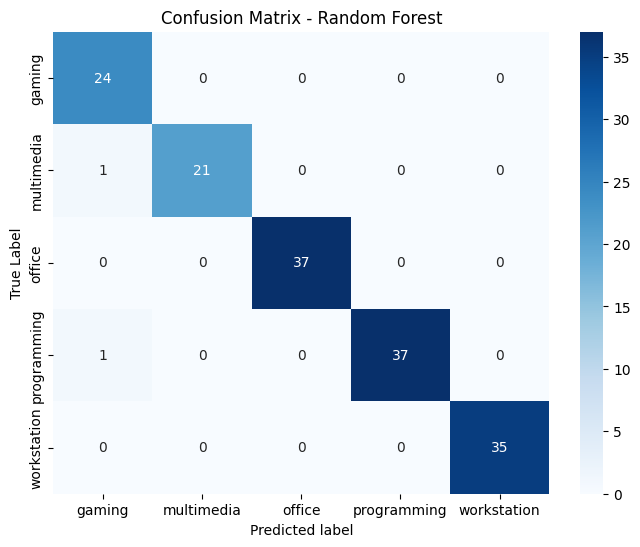

In [180]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_classifier.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

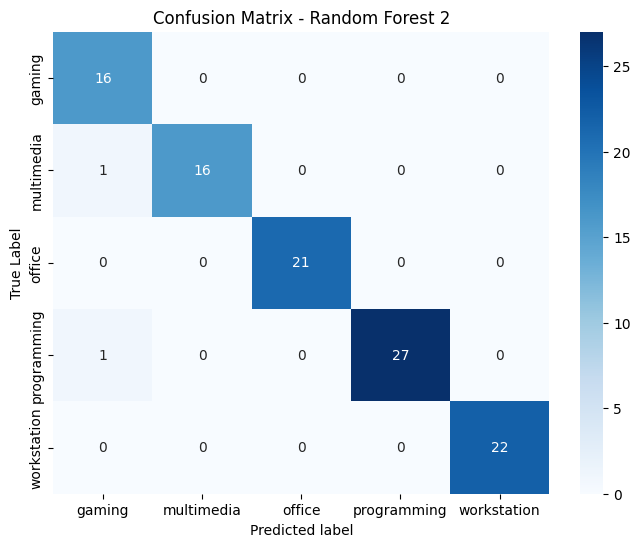

In [181]:
# Confusion Matrix
cm2 = confusion_matrix(J_test, J_pred, labels=rf_classifier2.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier2.classes_, yticklabels=rf_classifier2.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest 2')
plt.show()

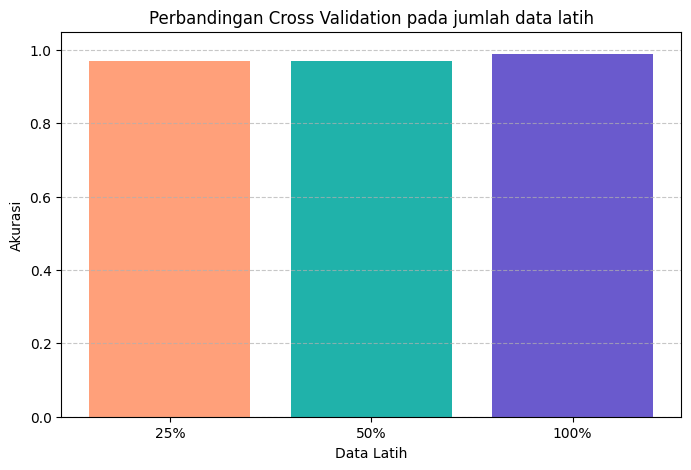

In [187]:
# ==============================
# 🎯 Visualisasi Perbandingan
# ==============================
acc25 = 0.97
acc50 = 0.97
acc100 = 0.99

hasil = [acc25, acc50, acc100]

data = ['25%', '50%', '100%']
plt.figure(figsize=(8,5))
plt.bar(data, hasil, color=['#FFA07A', '#20B2AA', '#6A5ACD'])
plt.ylim(0, 1.05)
plt.title('Perbandingan Cross Validation pada jumlah data latih')
plt.xlabel('Data Latih')
plt.ylabel('Akurasi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()